### Dogs Vs Cats

In [12]:
# Imports
import numpy as np

from PIL import Image

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import random
import pickle

Image size:  (500, 332)


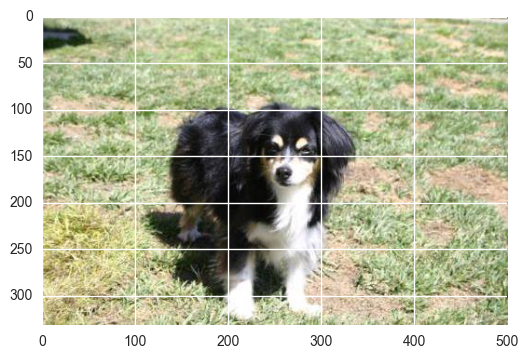

In [37]:
# Read an image
temp = Image.open('./data/dog.20.jpg')
print 'Image size: ', temp.size
plt.imshow(temp)
#plt.axis('off')

In [14]:
# Resize image
def resize_image(img, size):
    """
    input: 
        img = PIL image
        size = side length of square image (output)
    """
    # Resizing image
    x, y = img.size
    if x > y:
        nx = size
        ny = int(size * y/x + 0.5)
    else:
        nx = int(size * x/y + 0.5)
        ny = size
    temp_res = img.resize((nx, ny), resample=Image.ANTIALIAS)
    
    # Padding borders to create a square image
    temp_pad = Image.new('RGB', (size, size), (128, 128, 128))
    temp = ((size - nx)//2, (size - ny)//2)
    temp_pad.paste(temp_res, temp)
    return temp_pad

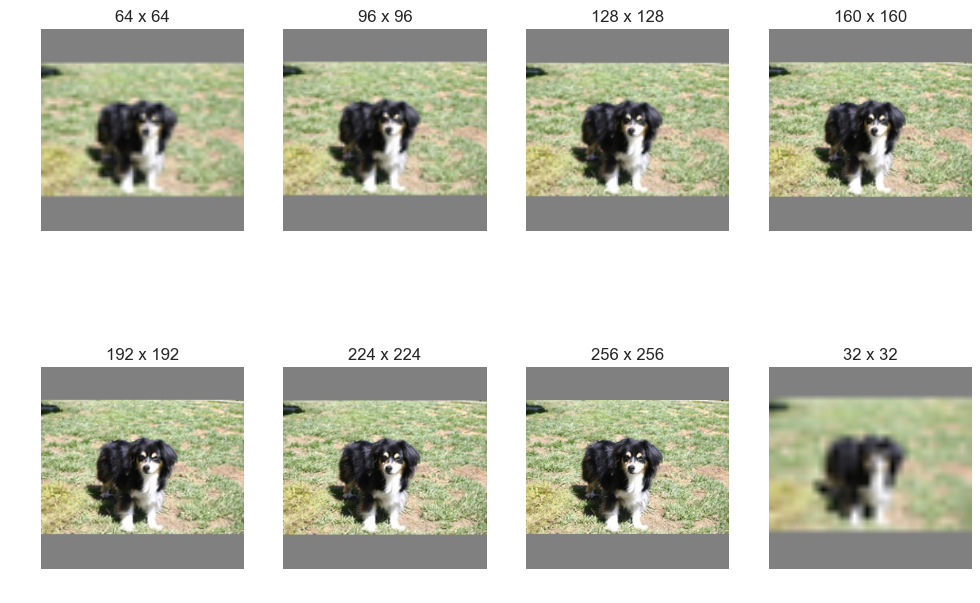

In [43]:
# Test image resize
dog = Image.open('./data/dog.20.jpg')

sizes = [32, 64, 96, 128, 160, 192, 224, 256]

plt.figure(figsize=(12, 8))

for i, size in enumerate(sizes):
    temp = resize_image(dog, size)
    plt.subplot(2, 4, i)
    plt.imshow(temp)
    plt.axis('off')
    plt.title('{} x {}'.format(size, size))
    
plt.show()

In [16]:
# Image to Numpy Array
def image_to_array(img):
    try:
        arr = np.asarray(img, dtype='uint8')
    except SystemError:
        arr = np.asarray(img, dtype='uint8')
    return arr

In [17]:
# Test Array conversion
dog = Image.open('./data/dog.20.jpg')
rdog = resize_image(dog, 96)
adog = image_to_array(rdog)
print adog.shape
print adog.T.shape

(96, 96, 3)
(3, 96, 96)


In [18]:
# Data preparation
#data_dir = './datasets/train/'
data_dir = './data/'
#data_dir = './dataset/'
dog_images = [data_dir + img for img in os.listdir(data_dir) if 'dog' in img]
cat_images = [data_dir + img for img in os.listdir(data_dir) if 'cat' in img]

print dog_images[:3], len(dog_images)
print cat_images[:3], len(cat_images)

images = dog_images + cat_images
random.shuffle(images)
print len(images)

['./data/dog.0.jpg', './data/dog.1.jpg', './data/dog.10.jpg'] 600
['./data/cat.0.jpg', './data/cat.1.jpg', './data/cat.10.jpg'] 600
1200


In [19]:
# Function to prepare data
SIZE = 96

def prepare_data(images):
    N = len(images)
    CHANNELS = 3
    # Create an ndarray (N, C, H, W)
    data = np.ndarray((N, CHANNELS, SIZE, SIZE), dtype=np.uint8)
    # Resize, reshape and append
    for i, img in enumerate(images):
        img_ = Image.open(img)
        temp_resize = resize_image(img_, SIZE)
        temp_array = image_to_array(temp_resize)
        data[i] = temp_array.T
        if i % 2500 == 0: print 'Processed {} of {} images'.format(i, N)
    return data  

X_all = prepare_data(images)

Processed 0 of 1200 images


In [20]:
# # Split data into training and testing
X_train_ = X_all[:800]
X_val_ = X_all[800:1000]
X_test_ = X_all[1000:]
print X_train_.shape
print X_val_.shape
print X_test_.shape

# Generate labels
labels = []
for i in images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)
        
y_all = np.array(labels)
print y_all.shape

y_train_ = y_all[:800]
y_val_ = y_all[800:1000]
y_test_ = y_all[1000:]
print y_train_.shape
print y_val_.shape
print y_test_.shape

(800, 3, 96, 96)
(200, 3, 96, 96)
(200, 3, 96, 96)
(1200,)
(800,)
(200,)
(200,)


In [11]:
# # Split data into training and testing
# X_train_ = X_all[:10000]
# X_val_ = X_all[10000:11000]
# X_test_ = X_all[11000:]
# print X_train_.shape
# print X_val_.shape
# print X_test_.shape

# # Generate labels
# labels = []
# for i in images:
#     if 'dog' in i:
#         labels.append(1)
#     else:
#         labels.append(0)
        
# y_all = np.array(labels)
# print y_all.shape

# y_train_ = y_all[:10000]
# y_val_ = y_all[10000:11000]
# y_test_ = y_all[11000:]
# print y_train_.shape
# print y_val_.shape
# print y_test_.shape

In [12]:
# # Split data into training and testing
# X_train_ = X_all[:20000]
# X_val_ = X_all[20000:22500]
# X_test_ = X_all[22500:]
# print X_train_.shape
# print X_val_.shape
# print X_test_.shape

# # Generate labels
# labels = []
# for i in images:
#     if 'dog' in i:
#         labels.append(1)
#     else:
#         labels.append(0)
        
# y_all = np.array(labels)
# print y_all.shape

# y_train_ = y_all[:20000]
# y_val_ = y_all[20000:22500]
# y_test_ = y_all[22500:]
# print y_train_.shape
# print y_val_.shape
# print y_test_.shape

(20000, 3, 96, 96)
(2500, 3, 96, 96)
(2500, 3, 96, 96)
(25000,)
(20000,)
(2500,)
(2500,)


In [21]:
X_train_mean = np.mean(X_train_, axis=0)
X_train_std = np.std(X_train_, axis=0)
print X_train_mean.shape
print X_train_std.shape
X_train = (X_train_ - X_train_mean)/X_train_std
print X_train.shape

(3, 96, 96)
(3, 96, 96)
(800, 3, 96, 96)


In [22]:
X_val = (X_val_ - X_train_mean)/X_train_std
X_test = (X_test_ - X_train_mean)/X_train_std

In [23]:
from cs231n.classifiers.cnn_dogcat import *
from cs231n.solver import Solver
print ThreeLayerConvNetTwoClass

<class 'cs231n.classifiers.cnn_dogcat.ThreeLayerConvNetTwoClass'>


In [24]:
small_data = {
  'X_train': X_train,
  'y_train': y_train_,
  'X_val': X_val,
  'y_val': y_val_,
}

model = ThreeLayerConvNetTwoClass(weight_scale=0.001, hidden_dim=150, reg=0.001)

solver = Solver(model, small_data,
                num_epochs=2, batch_size=100,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-3,
                },
                verbose=True, print_every=100)
solver.train()

(Iteration 1 / 16) loss: 0.693839
(Epoch 0 / 2) train acc: 0.501250; val_acc: 0.520000
(Epoch 1 / 2) train acc: 0.496250; val_acc: 0.480000
(Epoch 2 / 2) train acc: 0.585000; val_acc: 0.575000


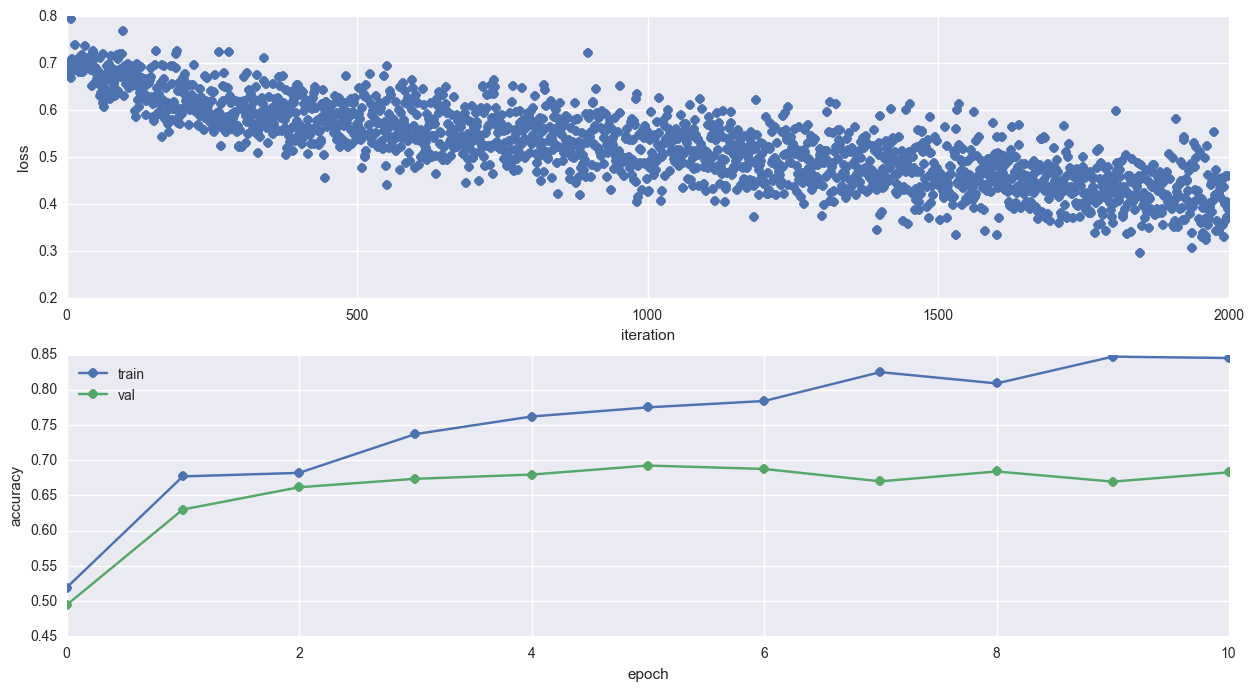

In [37]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [18]:
# # Save the model
# import pickle
# import cPickle

# # Save the model: 'wb' - write in binary format
# with open('model_4a.pkl', 'wb') as output_file:
#     pickle.dump(model.params, output_file, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('avg_4a.pkl', 'wb') as output_file:
#     pickle.dump(X_train_mean, output_file)
    
# with open('std_4a.pkl', 'wb') as output_file:
#     pickle.dump(X_train_std, output_file)

## Visualize Filters
You can visualize the first-layer convolutional filters from the trained network by running the following:

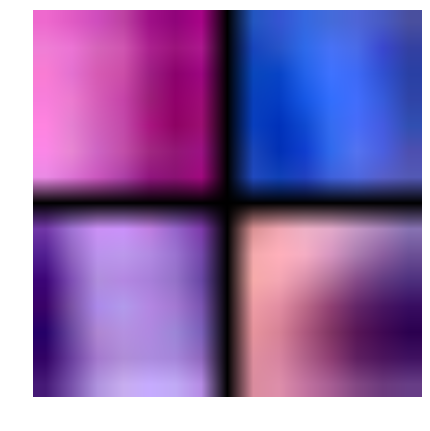

In [19]:
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

### Testing

In [20]:
# # Smaller testing data
# X_test_1 = X_test[:500]
# X_test_2 = X_test[500:1000]
# X_test_3 = X_test[1000:1500]
# X_test_4 = X_test[1500:2000]
# X_test_5 = X_test[2000:]

# # Smaller testing data
# y_test_1 = y_test_[:500]
# y_test_2 = y_test_[500:1000]
# y_test_3 = y_test_[1000:1500]
# y_test_4 = y_test_[1500:2000]
# y_test_5 = y_test_[2000:]

In [21]:
y_test_pred_1 = np.argmax(model.loss(X_test_1), axis=1)
print 'Test set-1 accuracy: ', (y_test_pred_1 == y_test_1).mean()

Test set-1 accuracy:  0.688


In [22]:
y_test_pred_2 = np.argmax(model.loss(X_test_2), axis=1)
print 'Test set-2 accuracy: ', (y_test_pred_2 == y_test_2).mean()

Test set-2 accuracy:  0.724


In [23]:
y_test_pred_3 = np.argmax(model.loss(X_test_3), axis=1)
print 'Test set-3 accuracy: ', (y_test_pred_3 == y_test_3).mean()

Test set-3 accuracy:  0.724


In [24]:
y_test_pred_4 = np.argmax(model.loss(X_test_4), axis=1)
print 'Test set-4 accuracy: ', (y_test_pred_4 == y_test_4).mean()

Test set-4 accuracy:  0.678


In [25]:
y_test_pred_5 = np.argmax(model.loss(X_test_5), axis=1)
print 'Test set-5 accuracy: ', (y_test_pred_5 == y_test_5).mean()

Test set-5 accuracy:  0.686


In [ ]:
m = []
print np.mean(m)

#### 4 Filters: All training data: Test set accuracy:  0.
#### 3 Filters: All training data: Test set accuracy:  0.686
#### 2 Filters: All training data: Test set accuracy:  0.671

In [26]:
a = X_train[0]
print a.shape

(3, 96, 96)


In [27]:
b = np.array(a)
print b.shape

(3, 96, 96)


In [28]:
c = np.ndarray((1, 3, 96, 96))
print c.shape

(1, 3, 96, 96)


In [25]:
# Testing Data
test_dir = './datasets/test/'
test_images = [test_dir + img for img in os.listdir(test_dir)]
print len(test_images)
print test_images[:3]

12500
['./datasets/test/1.jpg', './datasets/test/10.jpg', './datasets/test/100.jpg']


(96, 96, 3)
(3, 96, 96)


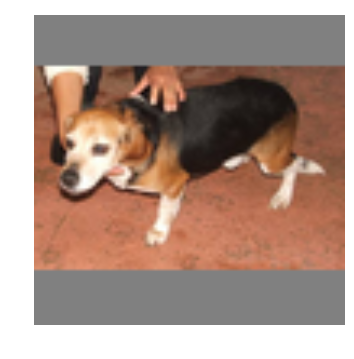

In [26]:
temp = Image.open('./datasets/test/201.jpg')
plt.imshow(temp)
plt.axis('off')
temp_res = resize_image(temp, 96)
plt.imshow(temp_res)
temp_arr = image_to_array(temp_res)
print temp_arr.shape
print temp_arr.T.shape

In [27]:
img_arr = (temp_arr.T - X_train_mean)/X_train_std
img_arr.shape

(3, 96, 96)

In [28]:
empty_arr = np.ndarray((1, 3, 96, 96), dtype='float64')
empty_arr[0] = img_arr

In [30]:
model.loss(empty_arr)

array([[ 0.03472106, -0.03016131]])

In [32]:
np.argmax(model.loss(empty_arr), axis=1)

In [36]:
np.max(model.loss(empty_arr), axis=1)[0]

0.034721055082116287

In [58]:
model.params['W1'].shape[2]

7

In [60]:
np.argmax(model.loss(empty_arr), axis=1)

array([1])

In [62]:
def predict(x, params):
    # Parameters
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']
    W3, b3 = params['W3'], params['b3']
    filter_size = 7
    conv_param = {'stride': 1, 'pad': (filter_size - 1) / 2}
    pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

    # Forward Pass
    out1, _ = conv_relu_pool_forward(x, W1, b1, conv_param, pool_param)
    N, num_filters, HH, WW = out1.shape
    out1_flattened = out1.reshape(N, num_filters * HH * WW)
    out2, _ = affine_relu_forward(out1_flattened, W2, b2)
    out3, _ = affine_forward(out2, W3, b3)
    scores = out3
    probs = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)[0]

In [63]:
predict(empty_arr, model.params)

1

In [8]:
arr = np.random.randn(3)
print arr

[-0.23944263  2.30845088  0.66042321]


In [9]:
np.argmax(arr, axis=0)

1

In [11]:
arr[np.argmax(arr, axis=0)]

2.3084508796293144